# 3. Supervised learning algorithm (지도 학습 알고리즘)

## 3-1. 예제에 사용할 데이터셋

X.shape: (26, 2)


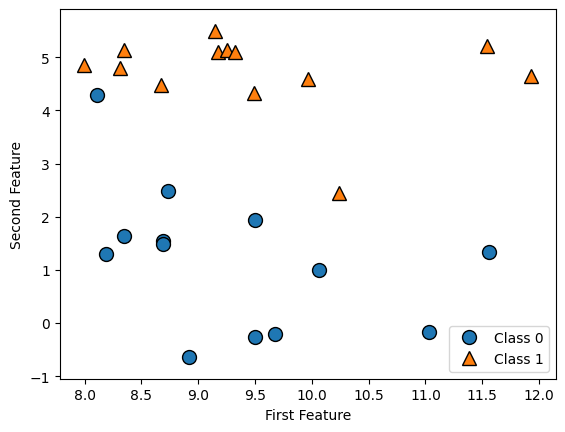

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# 두 개의 특성을 가진 인위적으로 만든 이진 분류 데이터셋인 forge 데이터셋을 생성
X, y = mglearn.datasets.make_forge()
# 산점도를 생성
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape:", X.shape);

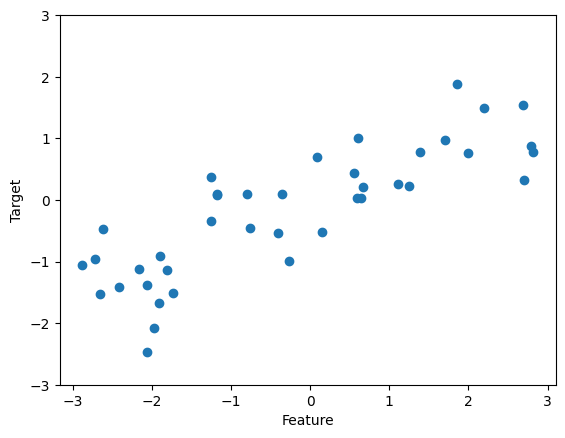

In [19]:
# 희귀 알고리즘 설명에는 인위적으로 만든 wave 데이터셋을 사용
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target");

In [20]:
# scikit-learn에 있는 load_breast_cancer 함수를 사용하여 불러올 수 있음
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.key():\n", cancer.keys())

cancer.key():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [21]:
# 이 데이터셋은 569개의 데이터 포인트를 가지고 있고 특성은 30개
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [22]:
# 569개 데이터 포인트 중 212개는 악성이고 357개는 양성
print("클래스별 샘플 개수:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [23]:
# feature_names 속성을 확인
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [24]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


c:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
c:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [25]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


## 3-2. k-최근접 이웃
- k-최근접(k-Nearest Neighbors) 알고리즘은 가장 간단한 머신러닝 알고리즘
- 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부
- 새로운 데이터 포인트에 대해 예측할 때는 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾음
### k-최근접 이웃 분류

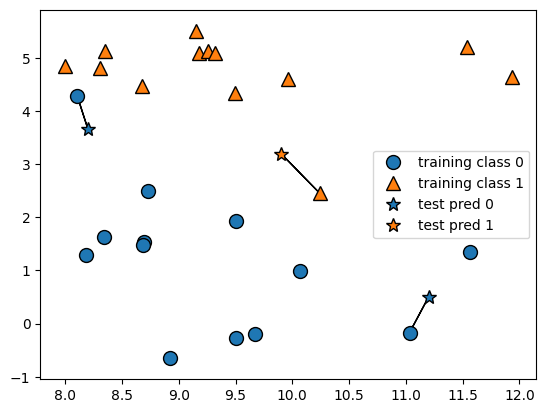

In [26]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

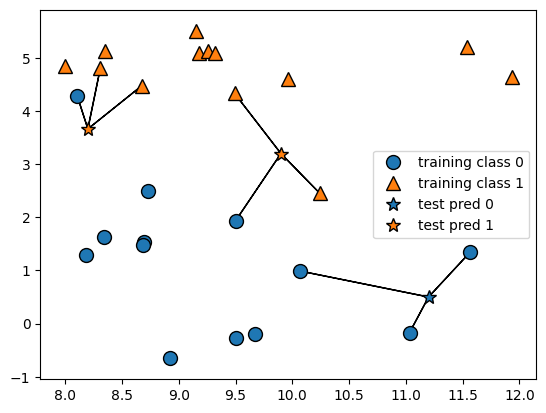

In [27]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [28]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [30]:
# 훈련 세트를 사용하여 분류 모델을 학습
# KNeighborsClassifier에서의 학습은 예측할 때 이웃을 찾을 수 있도록 데이터를 저장
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [32]:
# 모델이 얼마나 잘 일반화되었는지 평가하기 위해 score 메서드에 테스트 데이터와 테스트 레이블을 넣어 호출
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


### KNeighborsClassifier 분석
- 2차원 데이터셋이므로 가능한 모든 테스트 포인트 예측을 xy 평면에 그려볼 수 있음
- 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠하면 알고리즘의 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 결정 경계(decision boundary)를 볼 수 있음

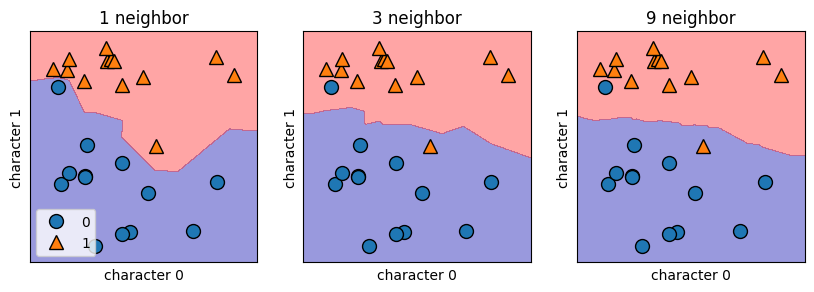

In [39]:
# 이웃이 1, 3, 9 개일 때의 결정 경계를 보여줌
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  # fit 메서드는 self 오브젝트를 리턴
  # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있음
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{} neighbor".format(n_neighbors))
  ax.set_xlabel("character 0")
  ax.set_ylabel("character 1")
axes[0].legend(loc=3);

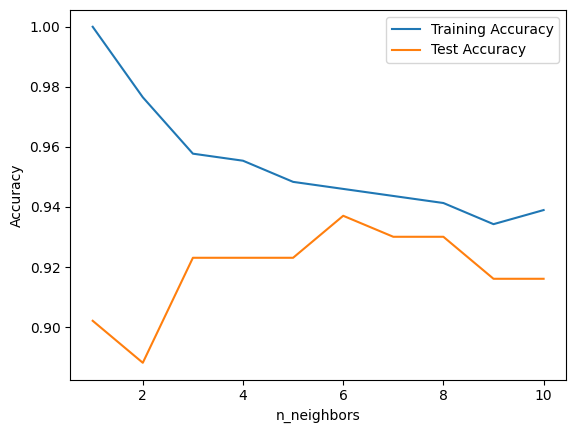

In [45]:
# 모델의 복잡도와 일반화 사이의 관계를 입증
# 훈련 세트와 테스트 세트로 나누고, 이웃의 수를 달리하여 훈련 세트와 테스트 세트의 성능을 평가
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
  cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # 훈련 세트 정확도 저장
  training_accuracy.append(clf.score(X_train, y_train))
  # 일반화 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

### k-최근접 이웃 회귀

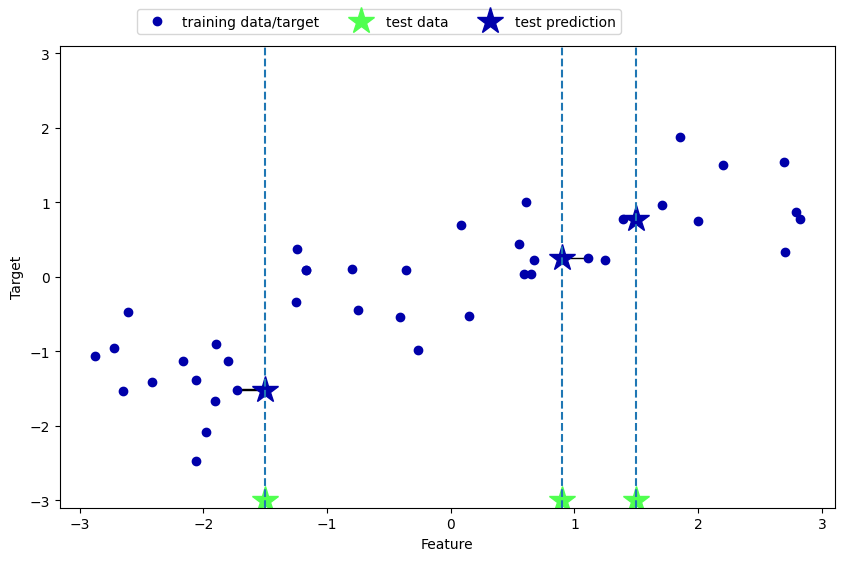

In [46]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

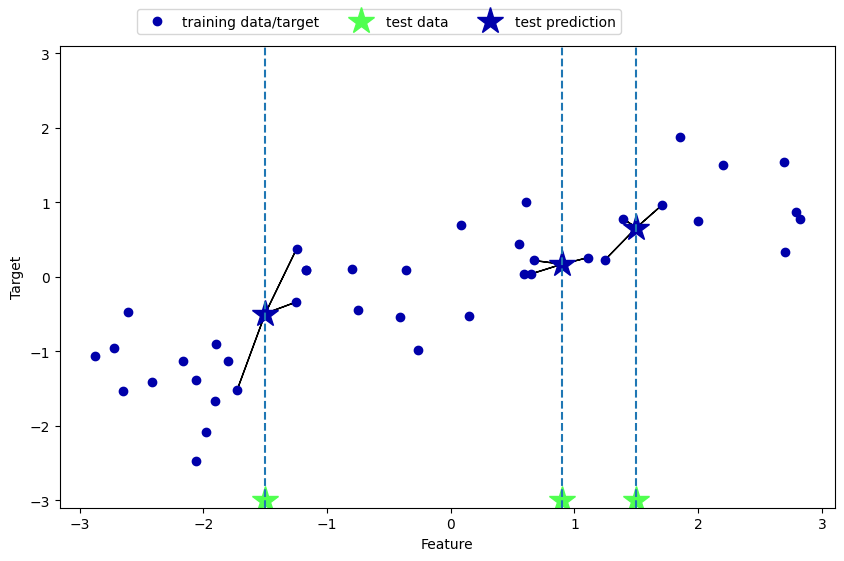

In [47]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [48]:
# scikit-learn에서 회귀를 위한 k-최근접 이웃 알고리즘은 KNeighborsRegressor에 구현되어있음
# 사용범은 KNeighborsClassifier와 유사
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듦
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킴
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [51]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [52]:
# 결정 계수인 R^2값은 회귀 모델에서 예측의 적합도를 측정한 것으로 보통 0에서 1 사이의 값임
# 1은 예측이 완벽한 경우, 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델의 경우
# R^2은 음수가 되는 경우, 예측과 타깃이 상반된 경향을 가지는 경우
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


### KNeighborsRegressor 분석